In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
% matplotlib inline

UsageError: Line magic function `%` not found.


In [21]:
data= pd.read_csv('Advertising.csv')

In [22]:
data.head()

Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [23]:
data.shape

(200, 5)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [25]:
data.isna().sum() 

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

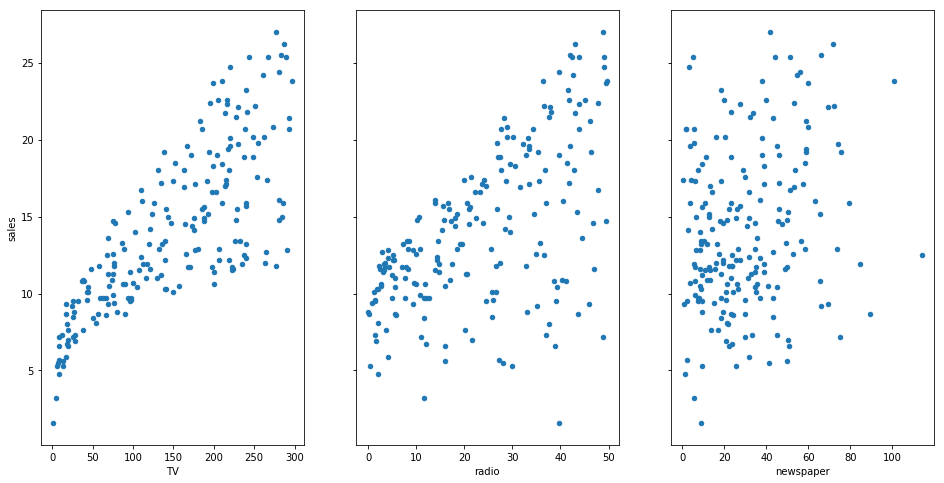

In [26]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

In [27]:

feature_cols = ['TV']
X = data[feature_cols]
y = data.sales


from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)


print(lm.intercept_)
print(lm.coef_)

7.032593549127695
[0.04753664]


In [28]:

7.032594 + 0.047537*50

9.409444

In [29]:
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

TV
0  50

In [30]:
lm.predict(X_new)

array([9.40942557])

### Plotting the Least Squares Line

In [31]:
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

TV
0    0.7
1  296.4

In [32]:

preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

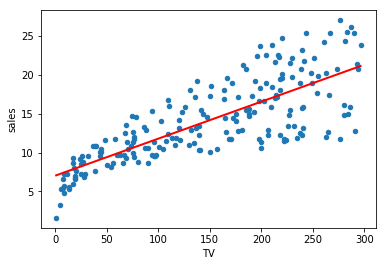

In [33]:

data.plot(kind='scatter', x='TV', y='sales')
plt.plot(X_new, preds, c='red', linewidth=2)

In [34]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV', data=data).fit()
lm.conf_int()

0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843

In [35]:

lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. 

Thus, a p-value of less than 0.05 is a way to decide whether there is any relationship between the feature in consideration and the response or not. Using 0.05 as the cutoff is just a convention.

In this case, the p-value for TV ads is way less than 0.05, and so we **believe** that there is a relationship between TV advertisements and Sales.

Note that we generally ignore the p-value for the intercept.


In [36]:

lm.rsquared

0.611875050850071

In [37]:

feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

lm = LinearRegression()
lm.fit(X, y)


print(lm.intercept_)
print(lm.coef_)

2.9388893694594103
[ 0.04576465  0.18853002 -0.00103749]


In [38]:
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 04 Mar 2020   Prob (F-statistic):           1.58e-96
Time:                        17:46:43   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:

lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()
lm.rsquared

0.8971942610828957

In [40]:

lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

In [41]:
import numpy as np


np.random.seed(12345)


nums = np.random.rand(len(data))
mask_large = nums > 0.5


data['Scale'] = 'small'
data.loc[mask_large, 'Scale'] = 'large'
data.head()

Unnamed: 0     TV  radio  newspaper  sales  Scale
0           1  230.1   37.8       69.2   22.1  large
1           2   44.5   39.3       45.1   10.4  small
2           3   17.2   45.9       69.3    9.3  small
3           4  151.5   41.3       58.5   18.5  small
4           5  180.8   10.8       58.4   12.9  large

In [42]:

data['IsLarge'] = data.Scale.map({'small':0, 'large':1})
data.head()

Unnamed: 0     TV  radio  newspaper  sales  Scale  IsLarge
0           1  230.1   37.8       69.2   22.1  large        1
1           2   44.5   39.3       45.1   10.4  small        0
2           3   17.2   45.9       69.3    9.3  small        0
3           4  151.5   41.3       58.5   18.5  small        0
4           5  180.8   10.8       58.4   12.9  large        1

In [43]:

feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge']
X = data[feature_cols]
y = data.sales

lm = LinearRegression()
lm.fit(X, y)


i=0
for col in feature_cols:
    print('The Coefficient of ',col, ' is: ',lm.coef_[i])
    i=i+1

The Coefficient of  TV  is:  0.04571982092436276
The Coefficient of  radio  is:  0.1887281431342785
The Coefficient of  newspaper  is:  -0.0010976794483516517
The Coefficient of  IsLarge  is:  0.05742385085482785


In [44]:

np.random.seed(123456)


nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Targeted Geography'] = 'rural'
data.loc[mask_suburban, 'Targeted Geography'] = 'suburban'
data.loc[mask_urban, 'Targeted Geography'] = 'urban'
data.head()

Unnamed: 0     TV  radio  newspaper  sales  Scale  IsLarge  \
0           1  230.1   37.8       69.2   22.1  large        1   
1           2   44.5   39.3       45.1   10.4  small        0   
2           3   17.2   45.9       69.3    9.3  small        0   
3           4  151.5   41.3       58.5   18.5  small        0   
4           5  180.8   10.8       58.4   12.9  large        1   

  Targeted Geography  
0              rural  
1              urban  
2              rural  
3              urban  
4           suburban

We need to represent the ‘Targeted Geography’ column numerically. But mapping urban=0, suburban=1 and rural=2 will mean that rural is two times suburban which is not the case.
Hence, we’ll create another **dummy variable**:


In [45]:

area_dummies = pd.get_dummies(data['Targeted Geography'], prefix='Targeted Geography').iloc[:, 1:]


data = pd.concat([data, area_dummies], axis=1)
data.head()

Unnamed: 0     TV  radio  newspaper  sales  Scale  IsLarge  \
0           1  230.1   37.8       69.2   22.1  large        1   
1           2   44.5   39.3       45.1   10.4  small        0   
2           3   17.2   45.9       69.3    9.3  small        0   
3           4  151.5   41.3       58.5   18.5  small        0   
4           5  180.8   10.8       58.4   12.9  large        1   

  Targeted Geography  Targeted Geography_suburban  Targeted Geography_urban  
0              rural                            0                         0  
1              urban                            0                         1  
2              rural                            0                         0  
3              urban                            0                         1  
4           suburban                            1                         0

In [46]:

feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge', 'Targeted Geography_suburban', 'Targeted Geography_urban']
X = data[feature_cols]
y = data.sales
lm = LinearRegression()
lm.fit(X, y)

print(feature_cols, lm.coef_)

['TV', 'radio', 'newspaper', 'IsLarge', 'Targeted Geography_suburban', 'Targeted Geography_urban'] [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]
